# Akshatha Venkatesh Prasad
# TSF GRIP 
## Task 1 - To predict the percentage of an student based on the no. of study hours using Supervised ML

# Importing of Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Reading Data

In [2]:
data_task1 = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
data_task1

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


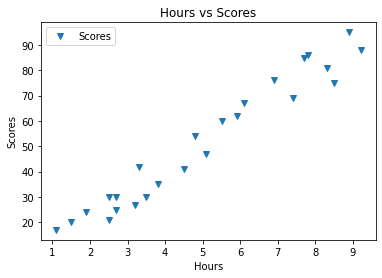

In [4]:
data_task1.plot(x='Hours', y='Scores', style='v')
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

# Splitting data into train (80%) and test (20%)

In [5]:
train_test_split = np.random.rand(len(data_task1['Hours'])) < 0.80
train_part = data_task1[train_test_split]
test_part = data_task1[~train_test_split]

In [6]:
train_part

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
10,7.7,85


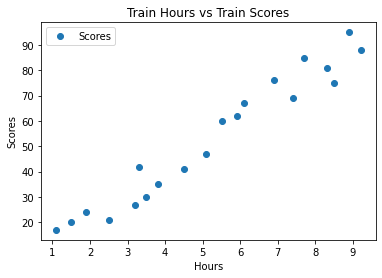

In [7]:
train_part.plot(x='Hours', y='Scores', style='o')
plt.title('Train Hours vs Train Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

In [8]:
test_part

,Hours,Scores
9,2.7,25
16,2.5,30
20,2.7,30
21,4.8,54
24,7.8,86


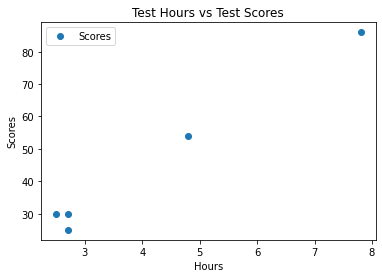

In [9]:
test_part.plot(x='Hours', y='Scores', style='o')
plt.title('Test Hours vs Test Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

# Separating features and labels

In [10]:
train_x, train_y = train_part['Hours'], train_part['Scores']
test_x, test_y = test_part['Hours'], test_part['Scores']

# Reshaping data to train the model

In [11]:
train_x = train_x.values.reshape((train_x.shape[0], 1))
test_x = test_x.values.reshape((test_x.shape[0], 1))

# Training the Linear Regression model

In [12]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(train_x, train_y) 

LinearRegression()

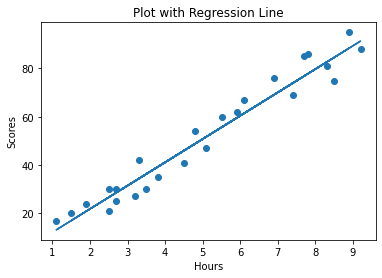

In [13]:
X = data_task1.iloc[:, :-1].values  
y = data_task1.iloc[:, 1].values  
line = model.coef_*X+model.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Plot with Regression Line') 
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

# Predicting using the model

In [14]:
print(test_x) 
pred_y= model.predict(test_x)
pred_test_values = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})  

[[2.7]
 [2.5]
 [2.7]
 [4.8]
 [7.8]]


In [15]:
pred_test_values

,Actual,Predicted
9,25,28.572046
16,30,26.640711
20,30,28.572046
21,54,48.851063
24,86,77.821087


# Evaluating Model using different regression metrics

In [16]:
mean_squared_error(test_y, pred_y)

23.897910734014935

In [17]:
mean_absolute_error(test_y, pred_y)

4.337427654755918

In [18]:
r2_score(test_y, pred_y)

0.9542536165122225

# Making Prediction on new data

In [32]:
new_hours = [9.25, 9.5, 7.7, 2.25, 0.5]
new_hours = np.array(new_hours)
new_hours = new_hours.reshape((new_hours.shape[0], 1))
new_pred = model.predict(new_hours)
new_hours = new_hours.reshape((new_hours.shape[0]))
pred_data = pd.DataFrame({'Hours':new_hours, 'Scores':new_pred})

In [33]:
new_hours

array([9.25, 9.5 , 7.7 , 2.25, 0.5 ])

In [34]:
new_pred

array([91.82326529, 94.23743395, 76.8554196 , 24.22654284,  7.32736223])

In [35]:
pred_data

,Hours,Scores
0,9.25,91.823265
1,9.50,94.237434
2,7.70,76.855420
3,2.25,24.226543
4,0.50,7.327362
